# Analysis of variance (ANOVA)

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print('Current working directory:', os.getcwd())

Current working directory: /workspaces/data_analytics/Week_06


## Read example data (used car data)

In [2]:
# Read data
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='anova_data')

# Show categories of 'Make'
print(df['Make'].value_counts())

# Show header
df.head()

Make
VW      20
BMW     20
Fiat    20
Name: count, dtype: int64


,Make,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create pivot table of mean price per make

In [3]:
# Create pivot table
table = pd.pivot_table(df, 
                       values='Price',
                       columns=['Make'], 
                       aggfunc=np.mean)
print(table)

Make       BMW     Fiat       VW
Price  54000.0  34000.0  41950.0


## Create grouped boxplot (groups = make, values = prices)

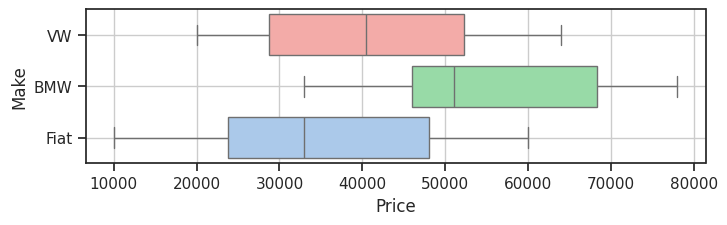

In [4]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Make",
                 palette=['r', 'g', 'b'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Analysis of variance (ANOVA)

In [5]:
# Create subsets (groups)
vw = df.loc[df['Make'] == 'VW']
bmw = df.loc[df['Make'] == 'BMW']
fiat = df.loc[df['Make'] == 'Fiat']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(vw['Price'],
                                fiat['Price'], 
                                bmw['Price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 9.791 p-value 0.0002


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW and Fiat differ. Note that, from the ANOVA, it is not clear which groups show differences of prices. For this a post-hoc test could be used (not part of the exercises).</p>

## Importing apartment data

In [6]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched_cleaned.csv', 
                 sep=';', 
                 encoding='utf-8')[['web-scraper-order',
                                    'address_raw',
                                    'lat',
                                    'lon',
                                    'bfs_number',
                                    'bfs_name',
                                    'rooms', 
                                    'area', 
                                    'luxurious', 
                                    'price', 
                                    'price_per_m2',
                                    'pop_dens',
                                    'frg_pct',
                                    'mean_taxable_income',
                                    'dist_supermarket']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(774, 15)


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create pivot table with mean price_per_m2 per room size

In [7]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price_per_m2']],
               index=['rooms'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
rooms,,
1.0,47.140400,50
1.5,59.417576,33
2.0,40.757105,38
2.5,37.391631,141
3.0,28.677955,44
3.5,29.942956,203
4.0,29.646429,28
4.5,26.493436,163


## Create grouped boxplot (groups = rooms, values = prices_per_m2)

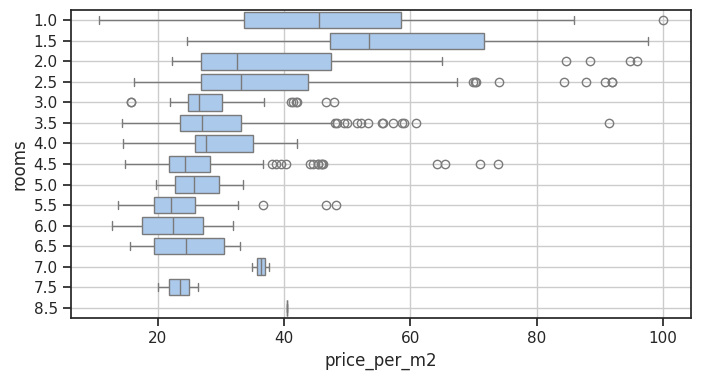

In [8]:
# Plot boxplot with groups
plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price_per_m2",
                 y="rooms",
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## ANOVA to compare the price_per_m2 per number of rooms (= groups)

In [9]:
# Create subsets (groups)
r2_5 = df.loc[df['rooms'] == 2.5]['price_per_m2']
r3_5 = df.loc[df['rooms'] == 3.5]['price_per_m2']
r4_5 = df.loc[df['rooms'] == 4.5]['price_per_m2']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(r2_5, r3_5, r4_5)

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 34.26 p-value 0.0


## Interpretation of result

### Create subsets based on population density

In [11]:
# Create subsets (groups) based on population density
low_pop_dens = df.loc[df['pop_dens'] <= 600]
moderate_pop_dens = df.loc[(df['pop_dens'] > 600) & (df['pop_dens'] <= 1500)]
high_pop_dens = df.loc[df['pop_dens'] > 1500]

# Show the size of each group
print('Low population density (pop_dens <= 600):', len(low_pop_dens))
print('Moderate population density (600 < pop_dens <= 1500):', len(moderate_pop_dens))
print('High population density (pop_dens > 1500):', len(high_pop_dens))

Low population density (pop_dens <= 600): 105
Moderate population density (600 < pop_dens <= 1500): 217
High population density (pop_dens > 1500): 452


### Create pivot table with mean price_per_m2 per population density group

In [12]:
# Create a categorical variable for population density
df['pop_dens_category'] = pd.cut(df['pop_dens'], 
                                   bins=[0, 600, 1500, float('inf')],
                                   labels=['Low', 'Moderate', 'High'])

# Create pivot table
pd.pivot_table(df[['pop_dens_category', 'price_per_m2', 'area', 'rooms']],
               index=['pop_dens_category'],
               values=['price_per_m2', 'area', 'rooms'],
               aggfunc=[np.mean, 'count'])

mean                        count                   
                         area price_per_m2     rooms  area price_per_m2 rooms
pop_dens_category                                                            
Low                112.780952    23.574190  4.214286   105          105   105
Moderate            91.686636    25.978065  3.668203   217          217   217
High                82.013274    38.317301  3.112832   452          452   452

### Create grouped boxplots for population density groups

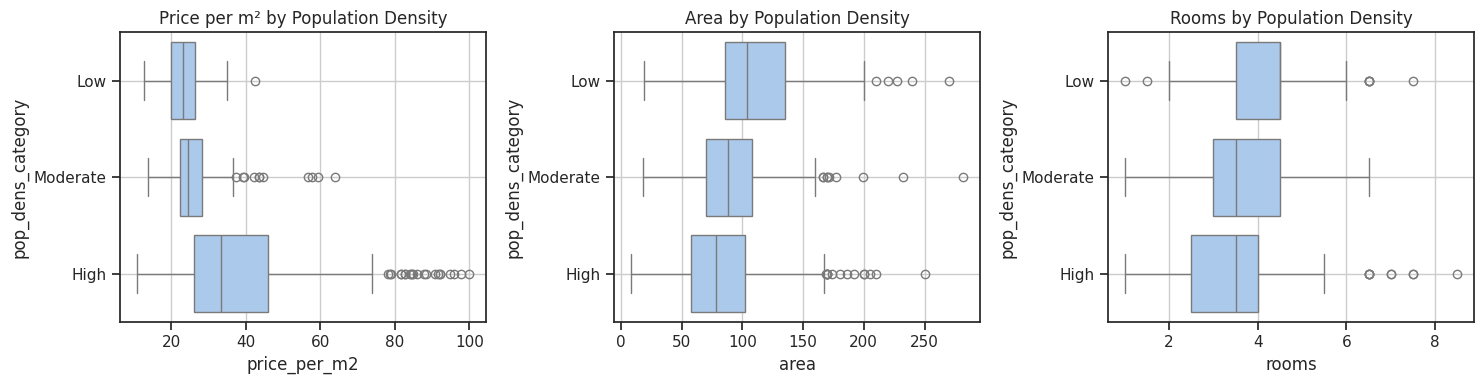

In [13]:
# Create boxplots for the three variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Price per m2
sns.boxplot(x="price_per_m2", y="pop_dens_category", data=df, orient='h', ax=axes[0])
axes[0].set_title('Price per m² by Population Density')
axes[0].grid()

# Area
sns.boxplot(x="area", y="pop_dens_category", data=df, orient='h', ax=axes[1])
axes[1].set_title('Area by Population Density')
axes[1].grid()

# Rooms
sns.boxplot(x="rooms", y="pop_dens_category", data=df, orient='h', ax=axes[2])
axes[2].set_title('Rooms by Population Density')
axes[2].grid()

plt.tight_layout()
plt.show()

### ANOVA for price_per_m2 by population density

**Hypotheses:**
- $H_0$ (Null hypothesis): The mean price per m² is equal across all three population density groups: $\mu_{low} = \mu_{moderate} = \mu_{high}$
- $H_1$ (Alternative hypothesis): At least one population density group has a different mean price per m²

**Significance level:** $\alpha = 0.05$

In [14]:
# Perform ANOVA for price_per_m2
fvalue_price, pvalue_price = stats.f_oneway(low_pop_dens['price_per_m2'],
                                             moderate_pop_dens['price_per_m2'],
                                             high_pop_dens['price_per_m2'])

# Print results
print('ANOVA for price_per_m2 by population density:')
print('F-value:', fvalue_price.round(3), 'p-value:', pvalue_price.round(4))

ANOVA for price_per_m2 by population density:
F-value: 91.272 p-value: 0.0


**Interpretation:** 

Because the p-value is much lower than 0.05 (p < 0.0001), we **reject the null hypothesis**. There is strong statistical evidence that the price per m² of rental apartments differs significantly between municipalities with different population densities. 

The descriptive statistics show that apartments in high population density areas (mean: 38.32 CHF/m²) are considerably more expensive per square meter than those in moderate density areas (mean: 25.98 CHF/m²) or low density areas (mean: 23.57 CHF/m²). This makes intuitive sense as urban areas with high population density typically have higher housing costs.

### ANOVA for area by population density

**Hypotheses:**
- $H_0$ (Null hypothesis): The mean area is equal across all three population density groups: $\mu_{low} = \mu_{moderate} = \mu_{high}$
- $H_1$ (Alternative hypothesis): At least one population density group has a different mean area

**Significance level:** $\alpha = 0.05$

In [15]:
# Perform ANOVA for area
fvalue_area, pvalue_area = stats.f_oneway(low_pop_dens['area'],
                                           moderate_pop_dens['area'],
                                           high_pop_dens['area'])

# Print results
print('ANOVA for area by population density:')
print('F-value:', fvalue_area.round(3), 'p-value:', pvalue_area.round(4))

ANOVA for area by population density:
F-value: 28.478 p-value: 0.0


**Interpretation:** 

Because the p-value is much lower than 0.05 (p < 0.0001), we **reject the null hypothesis**. There is strong statistical evidence that the area of rental apartments differs significantly between municipalities with different population densities.

The descriptive statistics show that apartments in low population density areas have larger mean areas (112.78 m²) compared to moderate density areas (91.69 m²) and high density areas (82.01 m²). This pattern is consistent with urban planning realities where space is more limited in densely populated urban centers, leading to smaller apartment sizes.

### ANOVA for number of rooms by population density

**Hypotheses:**
- $H_0$ (Null hypothesis): The mean number of rooms is equal across all three population density groups: $\mu_{low} = \mu_{moderate} = \mu_{high}$
- $H_1$ (Alternative hypothesis): At least one population density group has a different mean number of rooms

**Significance level:** $\alpha = 0.05$

In [16]:
# Perform ANOVA for rooms
fvalue_rooms, pvalue_rooms = stats.f_oneway(low_pop_dens['rooms'],
                                             moderate_pop_dens['rooms'],
                                             high_pop_dens['rooms'])

# Print results
print('ANOVA for rooms by population density:')
print('F-value:', fvalue_rooms.round(3), 'p-value:', pvalue_rooms.round(4))

ANOVA for rooms by population density:
F-value: 41.043 p-value: 0.0


**Interpretation:** 

Because the p-value is much lower than 0.05 (p < 0.0001), we **reject the null hypothesis**. There is strong statistical evidence that the number of rooms in rental apartments differs significantly between municipalities with different population densities.

The descriptive statistics show that apartments in low population density areas have more rooms on average (4.21 rooms) compared to moderate density areas (3.67 rooms) and high density areas (3.11 rooms). This trend aligns with the area findings - larger apartments in less densely populated areas naturally tend to have more rooms, while urban apartments in high-density areas are smaller and have fewer rooms.

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the price per m2 differ between apartments with 2.5, 3.5 and 4.5 rooms. Note that, from the ANOVA, it is not clear which groups show price differences. For this a post-hoc test could be used (not part of the exercises).</p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-12-07 16:49:09
Python Version: 3.11.14
-----------------------------------
